<a href="https://colab.research.google.com/github/sobir-git/Interactive-Statistics-Notebooks/blob/t-distribution/Students-T-Distribution/Student's%20t-distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install ipywidgets
! jupyter nbextension enable --py widgetsnbextension
! pip install seaborn

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Student's t-distribution

In this notebook, you will be introduced to the Student's *t*-distribution, its properties and use cases. We are going to see where does this distribution comes from and how it is related to the standard normal distribution(Gaussian distribution).

## Table of Contents
1. Warm-up Video (Optional)
2. Introduction
3. Sampling Experiment
4. Conclusion
5. References

# Warm-up Video (Optional)

The following video is optional, but it's helpful to watch it before you continue if you are the first time to know about t-distribution.

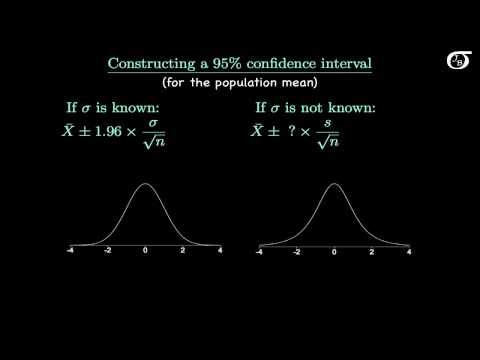

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('Uv6nGIgZMVw', width=800, height=400)

# Introduction

Let's start with the following example. 

>Suppose you are designing a test. The scores on that test are normally distributed, with a population mean of 60. Suppose 20 people are randomly selected and tested. The standard deviation in the sample group is 15. What is the probability that the average test score in the sample group will be at most 70?

In the above example population variance is unknown which makes it impossible to use normal distribution. In this case we can use the sample variance:
$$
S^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}(X_{i}-{\bar {X}})^{2}
$$

As a result, the distribution of the sample mean (normalized) will be Student's t-distribution.

### How Student's t-distribution arises from sampling
We will describe the previous example more generally and formally. 

Let $X_{1},\ldots ,X_{n}$ be independent and identically distributed as $N(\mu ,\sigma ^{2})$, i.e. this is a sample of size $n$ from a normally distributed population with expected mean value $\mu$  and variance $\sigma ^2$.

Let
$$
\bar{X} = \frac {1}{n} \sum _{i=1}^{n}X_{i}
$$

be the sample mean and let
from
$$
S^2=\frac {1}{n-1}\sum _{i=1}^{n}(X_{i}-{\bar {X}})^{2}
$$

be the sample variance. Then the random variable

$$
\frac {{\bar {X}}-\mu }{S/{\sqrt {n}}}
$$

has a Student's *t*-distribution with $n-1$ degrees of freedom.

## Probability density function (PDF)
Student's t-distribution has the probability density function given by

$$
f(t)={\frac {\Gamma ({\frac {\nu +1}{2}})}{{\sqrt {\nu \pi }}\,\Gamma ({\frac {\nu }{2}})}}\left(1+{\frac {t^{2}}{\nu }}\right)^{\!-{\frac {\nu +1}{2}}},
$$
where $\nu$  is the number of degrees of freedom and $\Gamma$ is the gamma function.

Here's is the plot of PDF for different degrees of freedoms.
![t-distribution pdf](https://financetrain.com/assets/t-dist1.gif)

**Question**:
- Why is the *t*-distribution more flat when its degrees of freedom is larger?

## Properties

- Mean $\mu = 0$ for $\nu > 1$, otherwise undefined;
- Median is $0$;
- Mode is $0$;
- Variance is $\frac{\nu}{\nu-2}$ for $\nu > 2$, $\infty$ for $1 < \nu \le 2$, otherwise undefined.

**Question:**
- Is the *t*-distribution symmetric? Why?


# Sampling Experiment

In this experiment we will show how *t*-distribution is similar to standard normal distribution. We achieve it with the following steps:

1. Draw sample from a population of uniform distribution.
2. Compute $z$ value $$z = \frac {{\bar {X}}-\mu }{\sigma /{\sqrt {n}}}$$
3. Compute $t$ value $$t = \frac {{\bar {X}}-\mu }{S /{\sqrt {n}}},$$
    where $$ S^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}(X_{i}-{\bar {X}})^{2}$$
4. Repeat the steps 1 to 3 several thousand times
5. Plot distribution of $z$ values and $t$ values

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

population_mean = 0
population_std = 1
def draw_sample(n):
    return np.array([np.random.normal(loc=population_mean, scale=population_std) for _ in range(n)])

def sample_some_t(N, sample_size=3000):
    t_sample = []
    for i in range(sample_size):
        sample = draw_sample(N)
        sample_mean = sample.mean()
        S = np.sqrt(
            1 / (N-1) * np.sum( (sample - sample_mean)**2 )
        )
        t_sample.append((sample.mean() - population_mean) / (S / np.sqrt(N)))
    return t_sample

def sample_some_z(N, sample_size=3000):
    z_sample = [(draw_sample(N).mean() - population_mean) / (population_std / np.sqrt(N)) 
                         for _ in range(sample_size)]
    return z_sample

@interact(N=widgets.IntSlider(min=2, max=25, value=5))
def experiment_sampling_t(N):
    
    t_sample = sample_some_t(N, sample_size=2777)
    z_sample = sample_some_z(N, sample_size=2777)
    
    
    fig, ax = plt.subplots()
    hist_range = (-5, 5)
    sns.distplot(z_sample, hist=True, kde=True,
             color = 'red', 
             bins=70,
             hist_kws={'alpha': 0.5, 'range': hist_range},
             kde_kws={'linewidth': 2},
                label='z',
                ax=ax)

    sns.distplot(t_sample, hist=True, kde=True,
             color = 'green', 
             bins=70,
             hist_kws={'alpha': 0.5, 'range':hist_range},
             kde_kws={'linewidth': 2},
                label='t',
                ax=ax)

    ax.set_xlim(hist_range)
    ax.set_ylim(0, 0.6)
    ax.set_title(f't-distribution with {N-1} degrees of freedom')
    ax.legend()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


interactive(children=(IntSlider(value=5, description='N', max=25, min=2), Output()), _dom_classes=('widget-int…

We note two importand things:
- When degrees of freedom $(N-1)$ becomes large, *t*-distribution will be approximately equal to the standard normal distribution.
- The intuition behind why *t*-distribution is more spread(particularly for small values of $N < 5$) than standard normal distribution is because of uncertainity about the population variance.

# Confidence intervals

![t-dist conf-int](https://user-images.githubusercontent.com/34193118/79111980-38304a80-7d86-11ea-8870-4c616587d5e0.png)

Let $T$ be a random variable having $t$-distribution with $n − 1$ degrees of freedom. Recall that by definition
$$
T = \frac{\overline{X}_n - \mu}{\frac{S_n}{\sqrt{n}}}
$$
where 
$$
S_{n}^{2} = {\frac {1}{n-1}} \sum _{i=1}^{n} \left(X_{i}-{\overline {X}}_{n}\right)^{2}
$$

Now, suppose the number $A$ is so chosen that
$$\Pr(-A < T < A)=0.9,$$
By symmetry, this is the same as saying that $A$ satisfies
$$\Pr(T < A) = 0.95,$$
so $A$ is the "95th percentile" of this probability distribution, or 
$A = t_{(0.05,n-1)}$. Then

$$\Pr \left (-A < \frac{\overline{X}_n - \mu}{\frac{S_n}{\sqrt{n}}} < A \right)=0.9,$$

and this is equivalent to
$$\Pr\left(\overline{X}_n - A \frac{S_n}{\sqrt{n}} < \mu < \overline{X}_n + A\frac{S_n}{\sqrt{n}}\right) = 0.9.$$

Therefore, the interval whose endpoints are
$$
{\overline {X}}_{n}\pm A{\frac {S_{n}}{\sqrt {n}}}
$$
is a 90% confidence interval for $\mu$. Therefore, if we find the mean of a set of observations that we can reasonably expect to have a normal distribution, we can use the t-distribution to examine whether the confidence limits on that mean include some theoretically predicted value – such as the value predicted on a null hypothesis.

It is this result that is used in the Student's t-tests: since the difference between the means of samples from two normal distributions is itself distributed normally, the t-distribution can be used to examine whether that difference can reasonably be supposed to be zero.

# Solving the example

In the beginning we brought the following example as a motivation for the *t*-distribution:

> Suppose you are designing a test. The scores on that test are normally distributed, with a population mean of 60. Suppose 20 people are randomly selected and tested. The standard deviation in the sample group is 15. What is the probability that the average test score in the sample group will be at most 70?



# Conclusion

- Let $X_1, \ldots , X_n$ be a random sample from the normal distribution with mean $\mu$ and variance $\sigma^2$. Let $\overline{X_n} = \frac{1}{n}\sum_{i=1}^{n} X_i$ and $\sigma' = \left(\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \overline{X_n})^2\right)^{1/2}$ . Then the distribution of $n^{1/2} (\overline{X_n} − \mu)/\sigma'$ is the *t*-distribution with $n - 1$ degrees of freedom.

- Gaussian distributions and Student’s *t*-distributions are some of the most important continuous probability distributions in statistics and machine learning.

- The *t*-distribution may be used as a placeholder for Gaussian when population variance is not known, or when the sample size is small. Both are closely related to each other in a strict and formal way.



# References

- https://www.freecodecamp.org/news/the-t-distribution-a-key-statistical-concept-discovered-by-a-beer-brewery-dbfdc693184/
- https://www.youtube.com/watch?v=Uv6nGIgZMVw